### Clust PC example notebook
Requirements: causallearn

In [46]:
# !pip install causal-learn
%load_ext autoreload
# !pip install Ipython --upgrade
# !pip install autoreload
# !pip install networkx
# !pip install gcastle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# %load_ext autoreload # Depending on environment might not be necessary
%autoreload 2
# from ipython import autoreload
import numpy as np
import causallearn
import random
from clustcausal.algs.clust_pc import ClustPC
from clustcausal.clusterdag.cluster_dag import CDAG
from clustcausal.utils.utils import *

In [48]:
# Define the nodes (have to be in topological ordering):
nodes = ['X1', 'X2', 'X3', 'Y1', 'Y2', 'Z1', 'Z2', 'Z3']

# nodes = ['X1', 'Y1', 'Z1', 'Z2', 'Z3']
# Define the edges (have to be in topological ordering):
edges = [('X1', 'X2'), ('X3', 'X2'), ('X3', 'Z3'), ('X2', 'Z2'), ('X1','Z1'), ('Y1','Z1'), ('Y2', 'Z2'), ('Y1','Z2'), ('Z1','Z2'), ('Z2','Z3')]

# edges = [('X1','Z1'), ('Y1','Z1'), ('Y1','Z2'), ('Z1','Z2'), ('Z2','Z3')]
# Define the cluster mapping:
cluster_mapping = {'X': ['X1', 'X2', 'X3'], 'Y': ['Y1', 'Y2'], 'Z': ['Z1', 'Z2', 'Z3']}
# cluster_mapping = {'X': ['X1'], 'Y': ['Y1'], 'Z': ['Z1', 'Z2', 'Z3']}
no_clust_mapping = {'A' : ['X1', 'X2', 'X3', 'Y1', 'Y2', 'Z1', 'Z2', 'Z3']}
no_clust_edges = []
# Define the cluster edges:
cluster_edges = [('X', 'Z'), ('Y', 'Z')]

In [49]:
# For easier debugging visualization or better understanding the verbose output
debug_nodes = ['0', '1', '2', '3', '4', '5', '6', '7']
debug_edges = [('0', '1'), ('2', '1'), ('2', '7'), ('1', '6'), ('0','5'), ('3','5'), ('4', '6'), ('3','6'), ('5','6'), ('6','7')]
debug_cluster_mapping = {'X': ['0', '1', '2'], 'Y': ['3', '4'], 'Z': ['5', '6', '7']}
debug_cluster_edges = [('X', 'Z'), ('Y', 'Z')]
debug_no_clust_mapping = {'A' : ['0', '1', '2', '3', '4', '5', '6', '7']}
debug_no_clust_edges = []
nodes = debug_nodes
edges = debug_edges
cluster_mapping = debug_cluster_mapping
cluster_edges = debug_cluster_edges
no_clust_mapping = debug_no_clust_mapping
no_clust_edges = debug_no_clust_edges

In [50]:
# # Further example C-DAGs
# perfect_cluster_mapping = {'C1': ['X1'], 'C2': ['X2'], 'C3': ['X3'], \
#                    'C4': ['X4'], 'C5': ['X5'], 'C6': ['X6'], 'C7': ['X7']}
# perfect_cluster_edges = [('C1', 'C2'), ('C2', 'C3'), ('C3', 'C4'), ('C4', 'C5'), \
#                  ('C1', 'C6'), ('C4', 'C6'), ('C5', 'C6'), ('C1', 'C7'), \
#                     ('C2', 'C7'), ('C6', 'C7')]
# # Or, an actual C-DAG
# cluster_mapping = {'C1': ['X1', 'X2', 'X3'], 'C2': ['X4', 'X5'], 'C3': ['X6', 'X7']}
# cluster_edges = [('C1', 'C2'), ('C1', 'C3'), ('C2', 'C3')]
# # Cluster mapping for 4 variables
# # cluster_mapping = {'C1': ['X1', 'X2'], 'C2':['X3','X4']}
# # cluster_edges = [('C1', 'C2')]
# cdag = CDAG(perfect_cluster_mapping, perfect_cluster_edges)
# cdag = CDAG(cluster_mapping, cluster_edges)
# cdag.node_names
# cdag.draw_cluster_graph()

INFO: oriented edge: (0,1)
INFO: removed edge: (0,2)
INFO: removed edge: (0,3)
INFO: removed edge: (0,4)
INFO: oriented edge: (0,5)
INFO: removed edge: (0,6)
INFO: removed edge: (0,7)
INFO: removed edge: (1,2)
INFO: removed edge: (1,3)
INFO: removed edge: (1,4)
INFO: removed edge: (1,5)
INFO: oriented edge: (1,6)
INFO: removed edge: (1,7)
INFO: removed edge: (2,3)
INFO: removed edge: (2,4)
INFO: removed edge: (2,5)
INFO: removed edge: (2,6)
INFO: oriented edge: (2,7)
INFO: removed edge: (3,4)
INFO: oriented edge: (3,5)
INFO: oriented edge: (3,6)
INFO: removed edge: (3,7)
INFO: removed edge: (4,5)
INFO: oriented edge: (4,6)
INFO: removed edge: (4,7)
INFO: oriented edge: (5,6)
INFO: removed edge: (5,7)
INFO: oriented edge: (6,7)


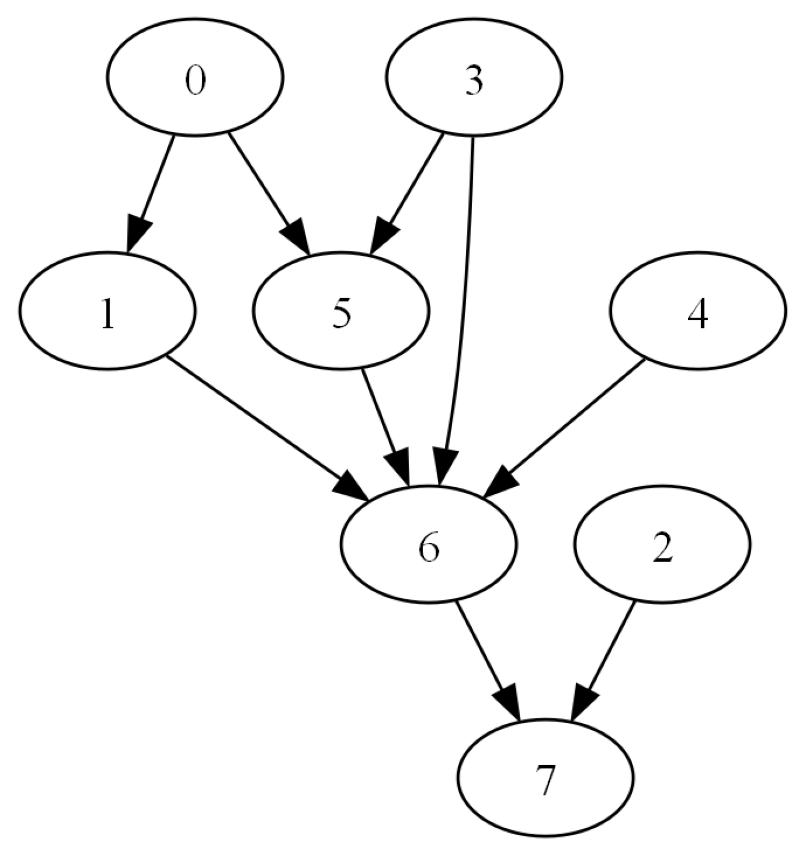

In [51]:
# Draw the ground truth graph
draw_graph(nodes, edges)

INFO: removed edge: (X,Y)
INFO: oriented edge: (X,Z)
INFO: oriented edge: (Y,Z)


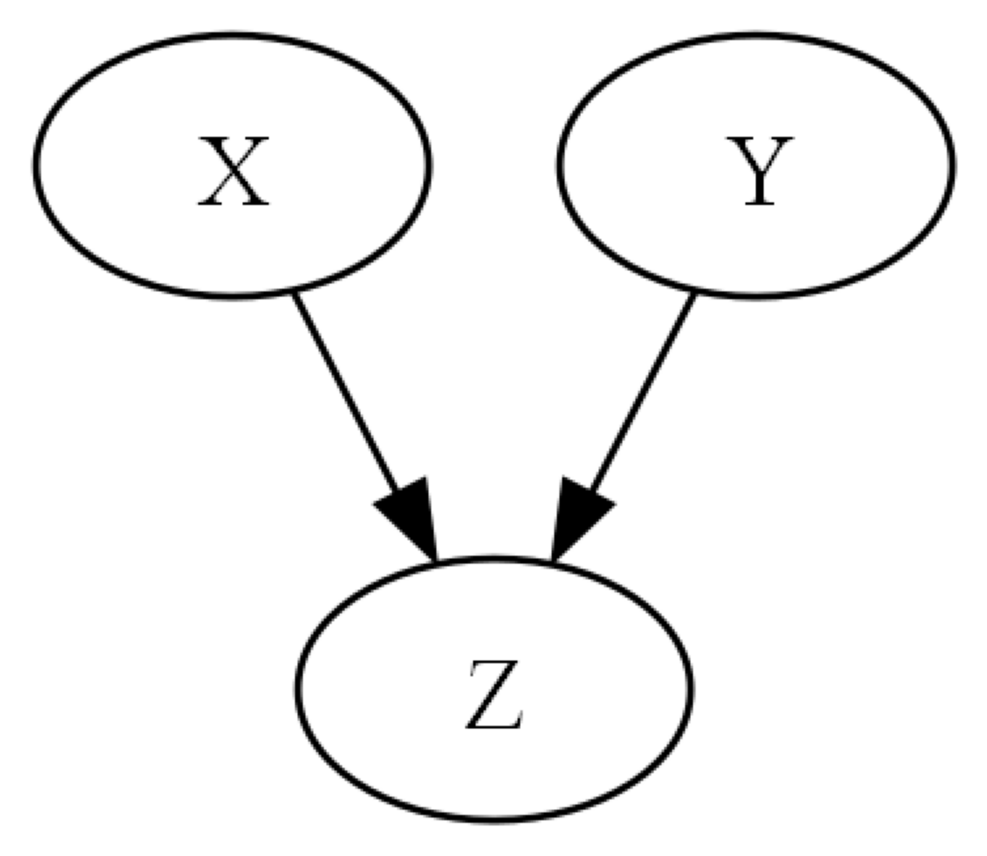

In [52]:
# Draw the cluster graph
cdag = CDAG(cluster_mapping, cluster_edges)
cdag.cluster_graph.draw_pydot_graph()

In [53]:
# Generate Gaussian ANM
# Example edge_weights, if None is given, they will be generated randomly
# edge_weights = {('X1', 'Z1'): 1, ('Y1', 'Z1'): 2, ('Y1', 'Z2'): 1, ('Z1', 'Z2'): -3, ('Z2', 'Z3'): 2}
edge_weights = None
data, edge_weights = generate_gaussian_anm(nodes, edges, seed = 42, edge_weights = edge_weights)
print(data.shape, edge_weights)
print(data[:4,:])

(10000, 8) {('0', '1'): -3, ('2', '1'): 2, ('2', '7'): 1, ('1', '6'): -1, ('0', '5'): -1, ('3', '5'): 3, ('4', '6'): -3, ('3', '6'): 2, ('5', '6'): -2, ('6', '7'): -3}
[[-1.30217951e+00  3.97213867e+00  1.03677079e+00 -4.21885354e-01
  -1.30193461e+00 -9.67256058e-01 -9.04753175e-01  4.08943541e+00]
 [ 1.27840403e-01  1.08381260e+00  7.31240517e-01  7.26907602e-01
   2.55188152e-01  5.55638406e-01 -7.11890862e-01  2.39881211e+00]
 [-3.16242592e-01 -6.27195581e-01 -1.27923458e-01 -7.37827617e-01
  -7.22138218e-02 -4.66761168e+00  8.00734084e+00 -2.33589462e+01]
 [-1.68011575e-02 -1.63959830e+00 -1.13910746e+00 -2.46998124e+00
  -4.00931718e-01 -8.42940691e+00  1.46208762e+01 -4.55776855e+01]]


In [54]:
# # For illustrative purposes, get mpdag and draw it manually (usually ClustPC handles this)
# mpdag = cdag.cdag_to_mpdag()
# cdag.draw_mpdag()

In [55]:
# Run ClustPC
# %autoreload 2
clustpc = ClustPC(cdag = cdag, data = data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = False, show_progress=True)

INFO: removed edge: (0,3)
INFO: removed edge: (0,4)
INFO: oriented edge: (0,5)
INFO: oriented edge: (0,6)
INFO: oriented edge: (0,7)
INFO: removed edge: (1,3)
INFO: removed edge: (1,4)
INFO: oriented edge: (1,5)
INFO: oriented edge: (1,6)
INFO: oriented edge: (1,7)
INFO: removed edge: (2,3)
INFO: removed edge: (2,4)
INFO: oriented edge: (2,5)
INFO: oriented edge: (2,6)
INFO: oriented edge: (2,7)
INFO: oriented edge: (3,5)
INFO: oriented edge: (3,6)
INFO: oriented edge: (3,7)
INFO: oriented edge: (4,5)
INFO: oriented edge: (4,6)
INFO: oriented edge: (4,7)


In [56]:
clustpc.cdag.cdag_list_of_topological_sort

['X', 'Y', 'Z']

In [57]:
result_cdag = clustpc.run()


Beginning work on cluster X

Intra phase in cluster X


Depth=0, working on node 2: 100%|██████████| 3/3 [00:00<00:00, 250.14it/s]


Deleted edge from 0 to 2
Deleted edge from 1 to 2

Beginning work on cluster Y

Intra phase in cluster Y


Depth=0, working on node 4: 100%|██████████| 2/2 [00:00<00:00, 285.87it/s]


Deleted edge from 3 to 4

Beginning work on cluster Z

Inter phase between low cluster Z and parent X


Depth=3, working on node 7: 100%|██████████| 6/6 [00:00<00:00, 300.19it/s]


Deleted edge from 6 to 2
Deleted edge from 2 to 5
Deleted edge from 0 to 7
Deleted edge from 7 to 1
Deleted edge from 1 to 5
Deleted edge from 6 to 1
Deleted edge from 5 to 7
Deleted edge from 0 to 6
Deleted edge from 5 to 0

Inter phase between low cluster Z and parent Y



Depth=1, working on node 7: 100%|██████████| 5/5 [00:00<00:00, 294.26it/s]

Deleted edge from 4 to 5


Depth=3, working on node 7: 100%|██████████| 5/5 [00:00<00:00, 263.31it/s]


Deleted edge from 7 to 4
Deleted edge from 3 to 7

Intra phase in cluster Z


Depth=3, working on node 7: 100%|██████████| 3/3 [00:00<00:00, 278.12it/s]

Applying edge orientation rules
Duration of algorithm was 0.3356008529663086sec


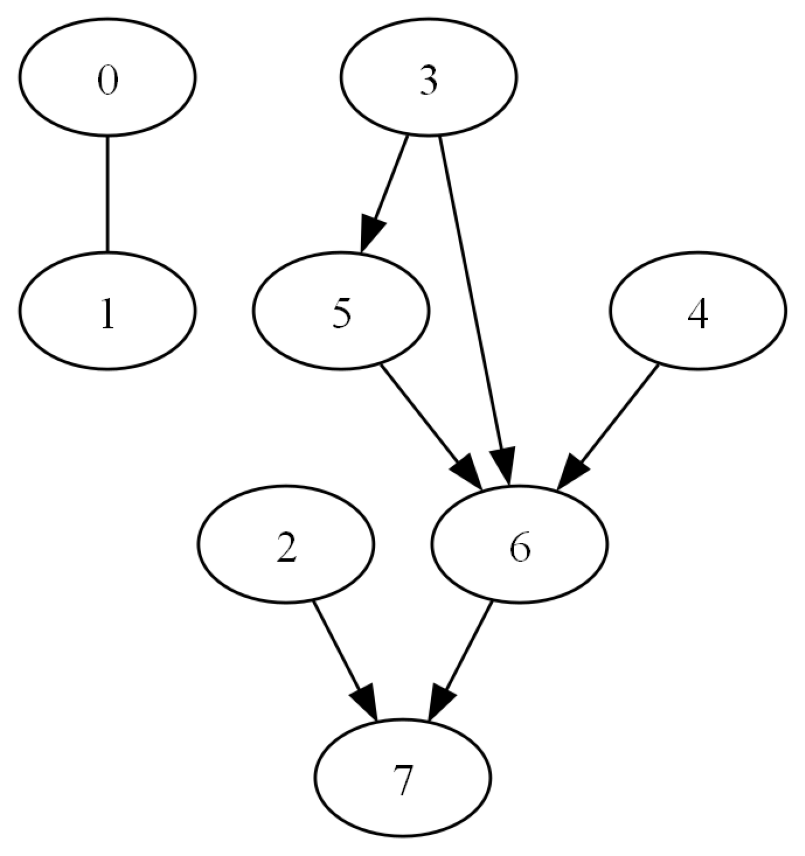

In [58]:
result_cdag.draw_pydot_graph()

Depth=3, working on node 7: 100%|██████████| 8/8 [00:00<00:00, 363.55it/s]


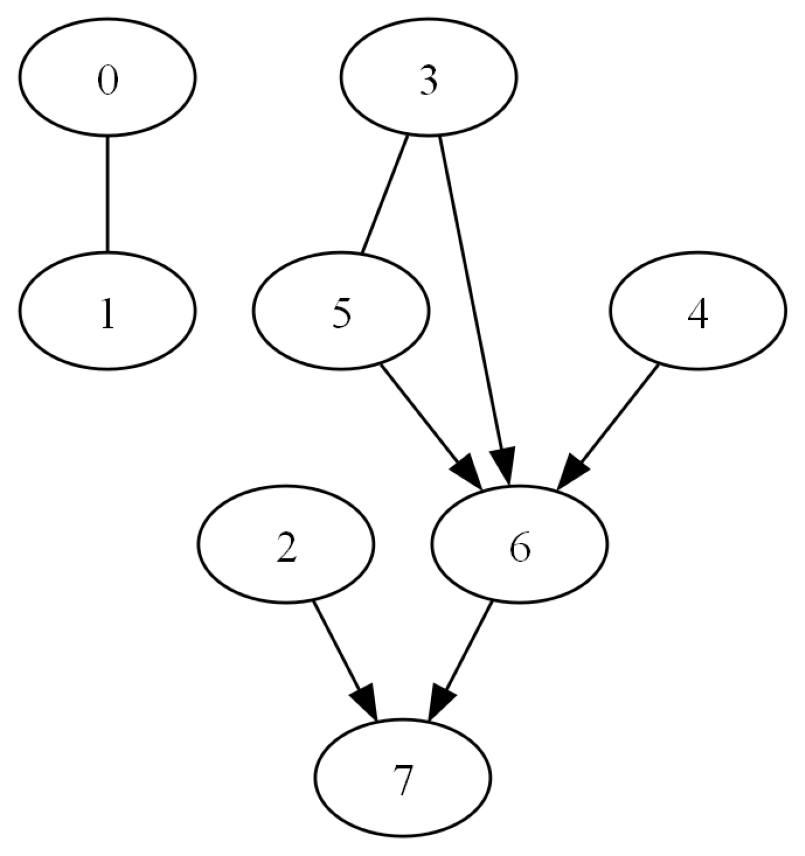

In [59]:
# comparison to pc from causallearn
from causallearn.search.ConstraintBased.PC import pc
causallearn_cg = pc(data)
causallearn_cg.node_names = nodes
causallearn_cg.draw_pydot_graph(labels = nodes)

In [60]:
causallearn_cg.node_names

['0', '1', '2', '3', '4', '5', '6', '7']

INFO: oriented edge: (0,1)
INFO: removed edge: (0,2)
INFO: removed edge: (0,3)
INFO: removed edge: (0,4)
INFO: oriented edge: (0,5)
INFO: removed edge: (0,6)
INFO: removed edge: (0,7)
INFO: removed edge: (1,2)
INFO: removed edge: (1,3)
INFO: removed edge: (1,4)
INFO: removed edge: (1,5)
INFO: oriented edge: (1,6)
INFO: removed edge: (1,7)
INFO: removed edge: (2,3)
INFO: removed edge: (2,4)
INFO: removed edge: (2,5)
INFO: removed edge: (2,6)
INFO: oriented edge: (2,7)
INFO: removed edge: (3,4)
INFO: oriented edge: (3,5)
INFO: oriented edge: (3,6)
INFO: removed edge: (3,7)
INFO: removed edge: (4,5)
INFO: oriented edge: (4,6)
INFO: removed edge: (4,7)
INFO: oriented edge: (5,6)
INFO: removed edge: (5,7)
INFO: oriented edge: (6,7)


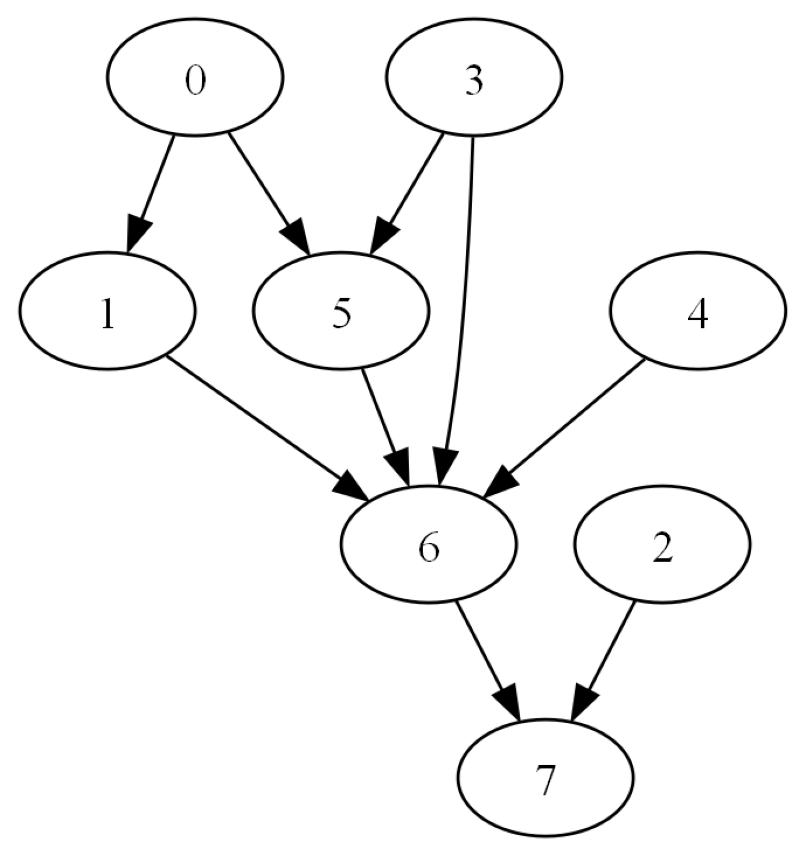

In [61]:
draw_graph(nodes, edges)

### Comparing CPC implementation with all nodes in one clust to PC baseline

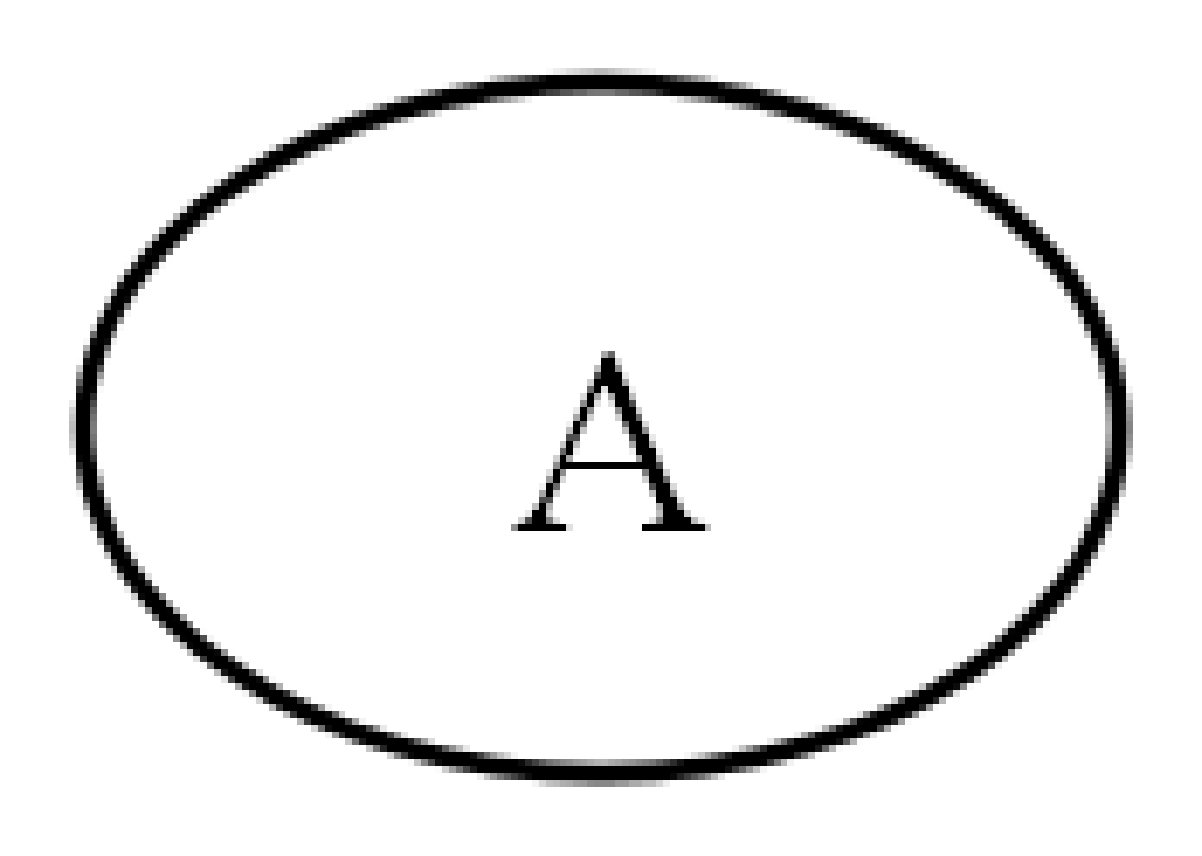

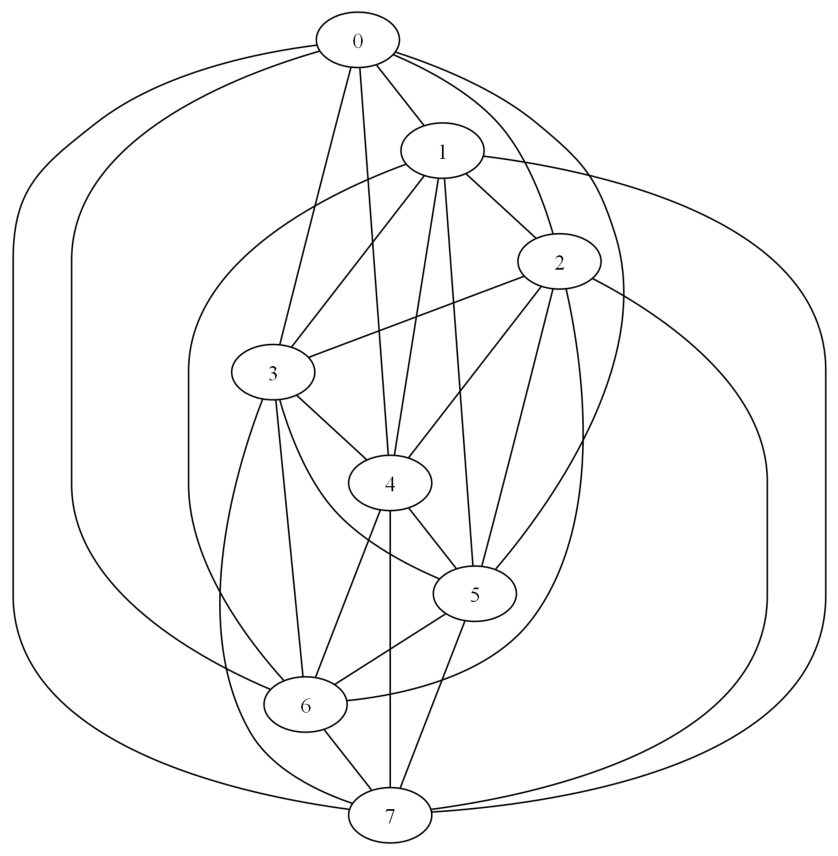

In [62]:
no_clust = CDAG(no_clust_mapping, no_clust_edges)
no_clust.draw_cluster_graph()
no_clust.cdag_to_mpdag()
no_clust.draw_mpdag()

INFO: oriented edge: (0,1)
INFO: removed edge: (0,2)
INFO: removed edge: (0,3)
INFO: removed edge: (0,4)
INFO: oriented edge: (0,5)
INFO: removed edge: (0,6)
INFO: removed edge: (0,7)
INFO: removed edge: (1,2)
INFO: removed edge: (1,3)
INFO: removed edge: (1,4)
INFO: removed edge: (1,5)
INFO: oriented edge: (1,6)
INFO: removed edge: (1,7)
INFO: removed edge: (2,3)
INFO: removed edge: (2,4)
INFO: removed edge: (2,5)
INFO: removed edge: (2,6)
INFO: oriented edge: (2,7)
INFO: removed edge: (3,4)
INFO: oriented edge: (3,5)
INFO: oriented edge: (3,6)
INFO: removed edge: (3,7)
INFO: removed edge: (4,5)
INFO: oriented edge: (4,6)
INFO: removed edge: (4,7)
INFO: oriented edge: (5,6)
INFO: removed edge: (5,7)
INFO: oriented edge: (6,7)


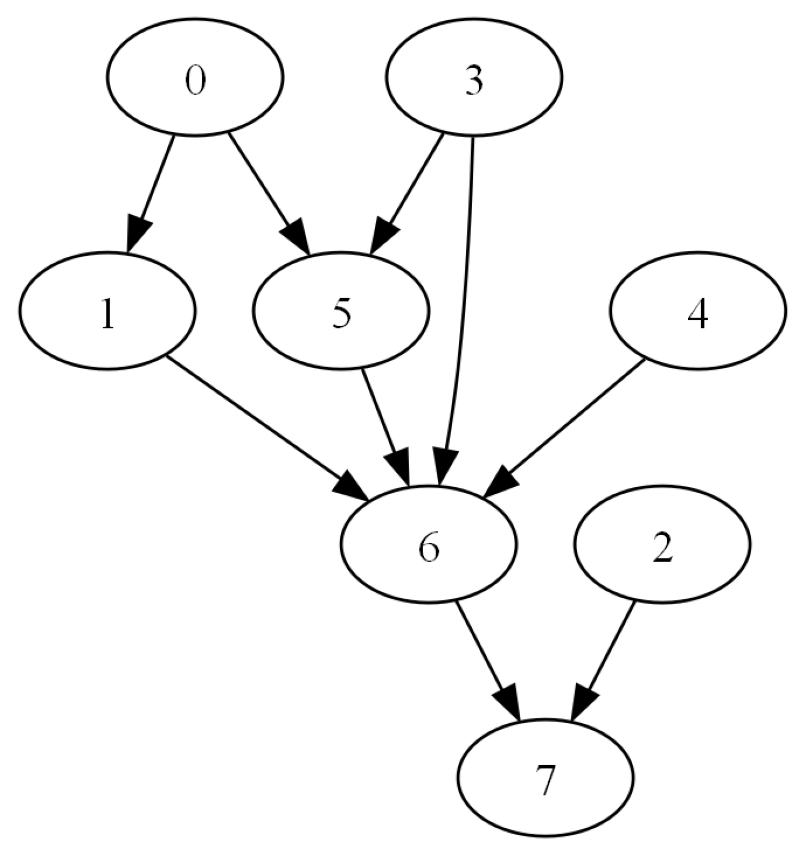

In [63]:
# ground truth
draw_graph(nodes, edges)

In [64]:
# PC
from causallearn.search.ConstraintBased.PC import pc
causallearn_cg = pc(data, verbose=True)
causallearn_cg.node_names = nodes

Depth=3, working on node 7: 100%|██████████| 8/8 [00:00<00:00, 182.25it/s]

0 dep 1 | () with p-value 0.000000

0 ind 2 | () with p-value 0.515784

0 ind 3 | () with p-value 0.828995

0 ind 4 | () with p-value 0.719741

0 dep 5 | () with p-value 0.000000

0 dep 6 | () with p-value 0.000000

0 dep 7 | () with p-value 0.000000

1 dep 0 | () with p-value 0.000000

1 ind 2 | () with p-value 0.815601

1 ind 3 | () with p-value 0.818303

1 ind 4 | () with p-value 0.513380

1 dep 5 | () with p-value 0.000000

1 dep 6 | () with p-value 0.000000

1 dep 7 | () with p-value 0.000000

2 ind 0 | () with p-value 0.515784

2 ind 1 | () with p-value 0.815601

2 ind 3 | () with p-value 0.953565

2 ind 4 | () with p-value 0.289306

2 ind 5 | () with p-value 0.775392

2 ind 6 | () with p-value 0.325838

2 dep 7 | () with p-value 0.000000

3 ind 0 | () with p-value 0.828995

3 ind 1 | () with p-value 0.818303

3 ind 2 | () with p-value 0.953565

3 ind 4 | () with p-value 0.420493

3 dep 5 | () with p-value 0.000000

3 dep 6 | () with p-value 0.000000

3 dep 7 | () with p-value 0.

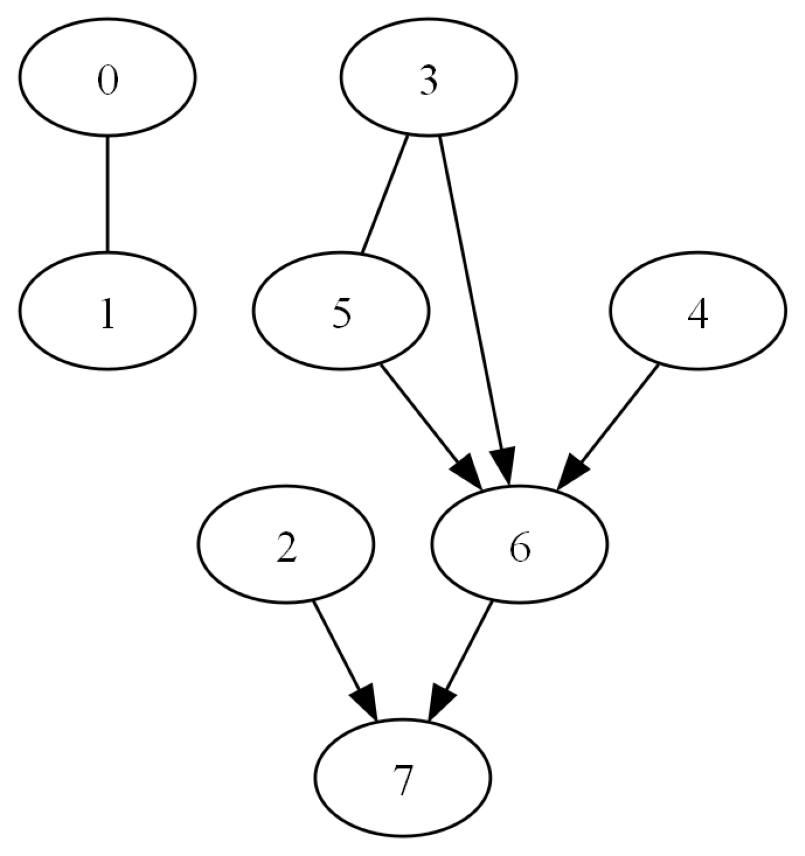

In [65]:
causallearn_cg.draw_pydot_graph(labels = nodes)

In [66]:
# CPC
%autoreload 2
clustpc = ClustPC(cdag = no_clust, data = data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = True, show_progress=True)
clustpc.run()


Beginning work on cluster A

Intra phase in cluster A
Cluster node indices are [0 1 2 3 4 5 6 7]
Local graph node indices are [0 1 2 3 4 5 6 7]


Depth=3, working on node 7: 100%|██████████| 8/8 [00:00<00:00, 336.60it/s]

Neighbors of 0 in A are [1 2 3 4 5 6 7]
Testing edges from 0 to 1
0 dep 1 | () with p-value 0.000000
Testing edges from 0 to 2
0 ind 2 | () with p-value 0.515784
Testing edges from 0 to 3
0 ind 3 | () with p-value 0.828995
Testing edges from 0 to 4
0 ind 4 | () with p-value 0.719741
Testing edges from 0 to 5
0 dep 5 | () with p-value 0.000000
Testing edges from 0 to 6
0 dep 6 | () with p-value 0.000000
Testing edges from 0 to 7
0 dep 7 | () with p-value 0.000000
Neighbors of 1 in A are [0 2 3 4 5 6 7]
Testing edges from 1 to 0
1 dep 0 | () with p-value 0.000000
Testing edges from 1 to 2
1 ind 2 | () with p-value 0.815601
Testing edges from 1 to 3
1 ind 3 | () with p-value 0.818303
Testing edges from 1 to 4
1 ind 4 | () with p-value 0.513380
Testing edges from 1 to 5
1 dep 5 | () with p-value 0.000000
Testing edges from 1 to 6
1 dep 6 | () with p-value 0.000000
Testing edges from 1 to 7
1 dep 7 | () with p-value 0.000000
Neighbors of 2 in A are [0 1 3 4 5 6 7]
Testing edges from 2 to 0


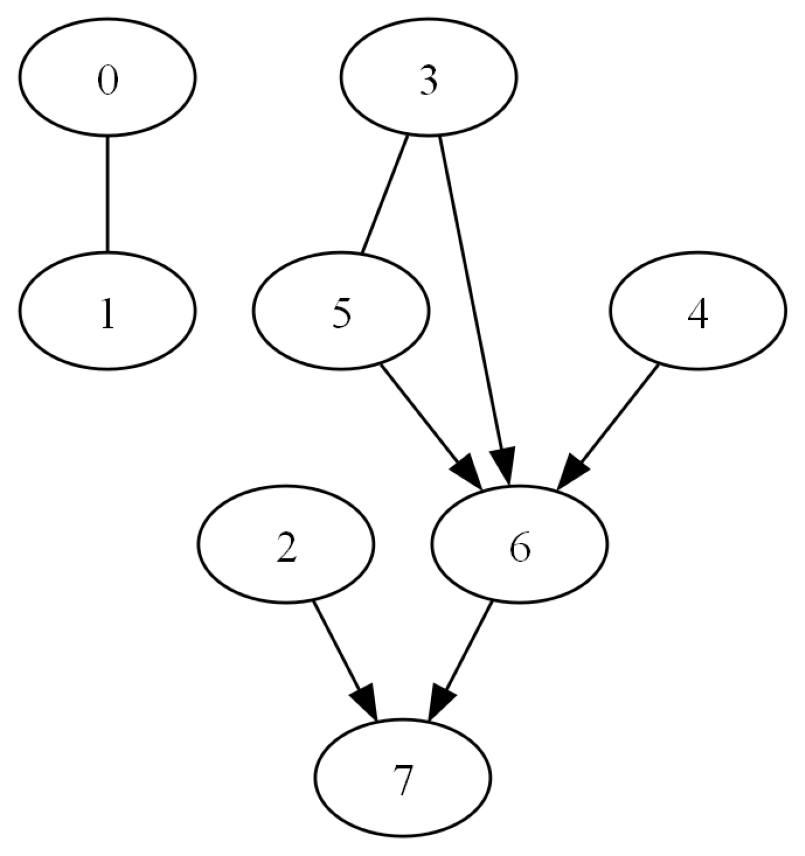

In [67]:
clustpc.cdag.cg.draw_pydot_graph()